# N·ªòI DUNG ƒê·ªÄ T√ÄI

### S·ª≠ d·ª•ng Hierarchical Clustering D·ª± b√°o xu h∆∞·ªõng gi√° v√†ng, Ph√°t hi·ªán c√°c m√¥ h√¨nh trong qu√° kh·ª© c√≥ th·ªÉ l·∫∑p l·∫°i trong t∆∞∆°ng lai.
* H·ªó tr·ª£ ƒë·∫ßu t∆∞: Gi√∫p nh√† ƒë·∫ßu t∆∞ ph√¢n lo·∫°i giai ƒëo·∫°n th·ªã tr∆∞·ªùng v√† ƒë∆∞a ra chi·∫øn l∆∞·ª£c ph√π h·ª£p.
* Ph√¢n t√≠ch t√°c ƒë·ªông kinh t·∫ø: X√°c ƒë·ªãnh ·∫£nh h∆∞·ªüng c·ªßa c√°c ch·ªâ s·ªë t√†i ch√≠nh ƒë·∫øn gi√° v√†ng.

Trong d·ª± √°n n√†y, ch√∫ng t√¥i s·ª≠ d·ª•ng h√†m linkage th·ª±c hi·ªán ph√¢n c·ª•m ph√¢n c·∫•p v·ªõi ph∆∞·ªùng th·ª©c l√† Euclidean Distance gi√∫p x√°c ƒë·ªãnh kho·∫£ng c√°ch gi·ªØa c√°c c·ª•m.

### Chu·∫©n b·ªã d·ªØ li·ªáu
* D·ªØ li·ªáu gi√° v√†ng ƒë∆∞·ª£c t·∫£i t·ª´ Yahoo Finance (GLD), quy ƒë·ªïi sang VND/l∆∞·ª£ng.
* T√≠nh hai ƒë·∫∑c tr∆∞ng: Daily_Change (% thay ƒë·ªïi gi√° h√†ng ng√†y) v√† Volatility (ƒë·ªô l·ªách chu·∫©n 7 ng√†y).


# Chu·∫©n b·ªã th∆∞ vi·ªán v√† thi·∫øt l·∫≠p d·ªØ li·ªáu

In [95]:
# Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [103]:
# T·∫£i d·ªØ li·ªáu gi√° v√†ng t·ª´ Yahoo Finance (GLD - SPDR Gold Shares)
ticker = "GLD"
data = yf.download(ticker, start="2020-01-01", end="2025-04-17")  # T·ª´ 2020 ƒë·∫øn hi·ªán t·∫°i
print(data)
data = data[['Close']].reset_index()  # Ch·ªâ l·∫•y gi√° ƒë√≥ng c·ª≠a v√† c·ªôt Date
data.columns = ['Date', 'Gold_Price']


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker             GLD         GLD         GLD         GLD       GLD
Date                                                                
2020-01-02  143.949997  144.210007  143.399994  143.860001   7733800
2020-01-03  145.860001  146.320007  145.399994  145.750000  12272800
2020-01-06  147.389999  148.479996  146.949997  148.440002  14403300
2020-01-07  147.970001  148.139999  147.429993  147.570007   7978500
2020-01-08  146.860001  148.610001  146.139999  148.490005  22248500
...                ...         ...         ...         ...       ...
2025-04-10  292.350006  292.859985  287.230011  288.809998  19837800
2025-04-11  297.929993  299.269989  296.809998  297.959991  21080100
2025-04-14  296.230011  296.579987  294.529999  295.540009  12427600
2025-04-15  297.779999  298.019989  296.089996  296.929993   7924100
2025-04-16  307.470001  308.059998  303.799988  304.649994  20778100

[1330 rows x 5 columns]


- Trong ƒëo·∫°n code t√¥i cung c·∫•p, d·ªØ li·ªáu gi√° v√†ng ƒë∆∞·ª£c l·∫•y t·ª´ Yahoo Finance th√¥ng qua m√£ ch·ª©ng kho√°n GLD (SPDR Gold Shares), m·ªôt qu·ªπ ETF ph·∫£n √°nh gi√° v√†ng tr√™n th·ªã tr∆∞·ªùng qu·ªëc t·∫ø. Do ƒë√≥, ƒë∆°n v·ªã gi√° v√†ng ·ªü ƒë√¢y kh√¥ng ph·∫£i l√† gi√° theo "ch·ªâ" hay "l∆∞·ª£ng" theo c√°ch t√≠nh ·ªü Vi·ªát Nam, m√† l√† gi√° theo USD tr√™n m·ªói c·ªï phi·∫øu c·ªßa GLD.
- GLD l√† m·ªôt qu·ªπ ETF (Exchange-Traded Fund) ƒë∆∞·ª£c ni√™m y·∫øt tr√™n s√†n NYSE, ƒë·∫°i di·ªán cho gi√° tr·ªã c·ªßa v√†ng v·∫≠t ch·∫•t. M·ªói c·ªï phi·∫øu GLD t∆∞∆°ng ·ª©ng v·ªõi kho·∫£ng 1/10 ounce v√†ng (1 ounce = 31.1035 gram, theo chu·∫©n v√†ng qu·ªëc t·∫ø - troy ounce).
- Gi√° GLD thay ƒë·ªïi theo gi√° v√†ng tr√™n th·ªã tr∆∞·ªùng qu·ªëc t·∫ø, ƒë∆∞·ª£c t√≠nh b·∫±ng USD/ounce, v√† gi√° c·ªï phi·∫øu GLD ph·∫£n √°nh g·∫ßn ƒë√∫ng gi√° v√†ng sau khi ƒëi·ªÅu ch·ªânh chi ph√≠ qu·∫£n l√Ω qu·ªπ.
- ƒê∆°n v·ªã trong code
    + Trong code, c·ªôt Close t·ª´ yfinance tr·∫£ v·ªÅ gi√° ƒë√≥ng c·ª≠a c·ªßa GLD m·ªói ng√†y, ƒë∆°n v·ªã l√† USD/c·ªï phi·∫øu.
    + V√≠ d·ª•: N·∫øu ng√†y 03/04/2025, gi√° GLD l√† 200 USD/c·ªï phi·∫øu, th√¨ gi√° v√†ng qu·ªëc t·∫ø t∆∞∆°ng ·ª©ng kho·∫£ng 2000 USD/ounce (v√¨ 1 c·ªï phi·∫øu GLD ~ 1/10 ounce).

- ·ªû Vi·ªát Nam:
    + 1 ch·ªâ = 3.75 gram.
    + 1 l∆∞·ª£ng = 10 ch·ªâ = 37.5 gram.
    + Trong khi ƒë√≥, 1 ounce = 31.1035 gram, n√™n 1 l∆∞·ª£ng Vi·ªát Nam ‚âà 1.205 ounce.

- N·∫øu b·∫°n mu·ªën ph√¢n t√≠ch gi√° v√†ng theo VND/l∆∞·ª£ng thay v√¨ USD/c·ªï phi·∫øu GLD
    + Chuy·ªÉn t·ª´ GLD sang USD/ounce
    + Chuy·ªÉn t·ª´ USD/ounce sang VND/l∆∞·ª£ng

In [104]:
# Quy ƒë·ªïi sang USD/ounce v√† VND/l∆∞·ª£ng
data['Gold_Price_Ounce'] = data['Gold_Price'] * 10  # USD/ounce
exchange_rate = 25000  # T·ª∑ gi√° USD/VND (c·∫≠p nh·∫≠t theo ng√†y th·ª±c t·∫ø)
data['Gold_Price_VND_per_Luong'] = (data['Gold_Price_Ounce'] * exchange_rate) / 0.8294  # VND/l∆∞·ª£ng

In [105]:
# T√≠nh ƒë·∫∑c tr∆∞ng: t·ª∑ l·ªá thay ƒë·ªïi h√†ng ng√†y v√† bi·∫øn ƒë·ªông
data['Daily_Change'] = data['Gold_Price_VND_per_Luong'].pct_change() * 100  # % thay ƒë·ªïi
data['Volatility'] = data['Gold_Price_VND_per_Luong'].rolling(window=7).std()  # Bi·∫øn ƒë·ªông 7 ng√†y
data = data.dropna()  # Lo·∫°i b·ªè NaN

In [106]:
# Chu·∫©n b·ªã d·ªØ li·ªáu cho clustering
X = data[['Daily_Change', 'Volatility']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

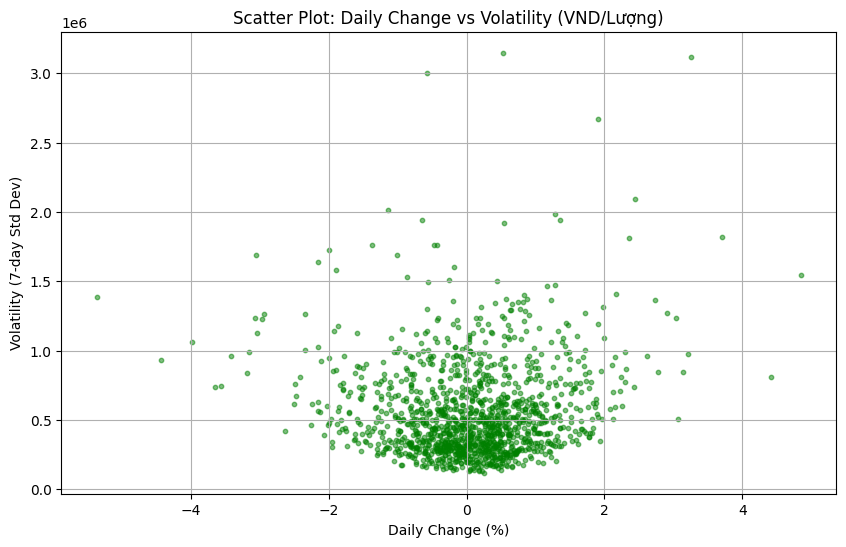

In [107]:
# 1. V·∫Ω scatter plot c·ªßa Daily_Change v√† Volatility
plt.figure(figsize=(10, 6))
plt.scatter(data['Daily_Change'], data['Volatility'], s=10, c='green', alpha=0.5)
plt.title('Scatter Plot: Daily Change vs Volatility (VND/L∆∞·ª£ng)')
plt.xlabel('Daily Change (%)')
plt.ylabel('Volatility (7-day Std Dev)')
plt.grid(True)
plt.show()

# √Åp d·ª•ng Hierarchical Clustering b·∫±ng ph∆∞∆°ng th·ª©c Euclidean Method

In [108]:
Z = linkage(X_scaled, method='average', metric='euclidean')

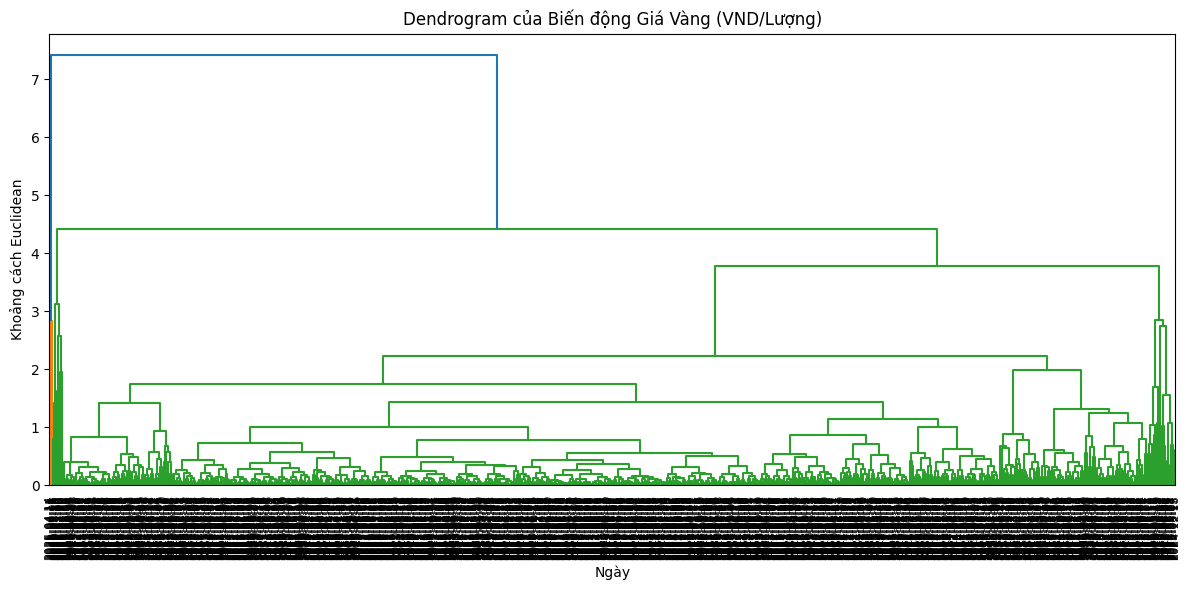

In [109]:
# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=data['Date'].dt.strftime('%Y-%m-%d').values, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram c·ªßa Bi·∫øn ƒë·ªông Gi√° V√†ng (VND/L∆∞·ª£ng)')
plt.xlabel('Ng√†y')
plt.ylabel('Kho·∫£ng c√°ch Euclidean')
plt.tight_layout()
plt.show()

In [112]:
# 3. Chia th√†nh 3 c·ª•m b·∫±ng h√†m fcluster
num_hierarchical_clusters = 3  # Ch·ªçn s·ªë c·ª•m
hierarchical_clusters = fcluster(Z, t=num_hierarchical_clusters, criterion='maxclust')
data['Cluster'] = hierarchical_clusters

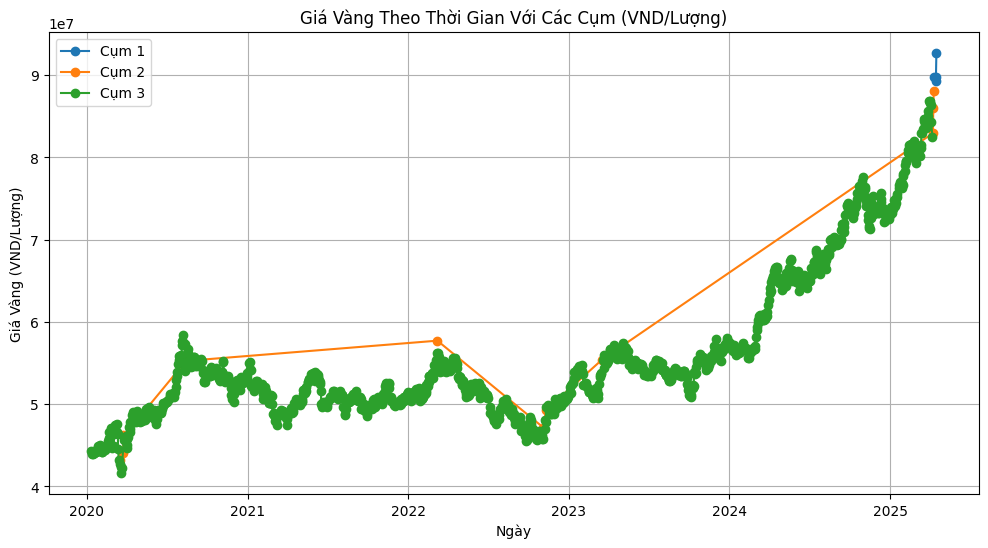

In [113]:
# 4. V·∫Ω bi·ªÉu ƒë·ªì gi√° v√†ng v·ªõi c√°c c·ª•m
plt.figure(figsize=(12, 6))
for cluster in np.unique(hierarchical_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.plot(cluster_data['Date'], cluster_data['Gold_Price_VND_per_Luong'], label=f'C·ª•m {cluster}', marker='o', linestyle='-')
plt.title('Gi√° V√†ng Theo Th·ªùi Gian V·ªõi C√°c C·ª•m (VND/L∆∞·ª£ng)')
plt.xlabel('Ng√†y')
plt.ylabel('Gi√° V√†ng (VND/L∆∞·ª£ng)')
plt.legend()
plt.grid(True)
plt.show()

- Tr√™n bi·ªÉu ƒë·ªì b·∫°n cung c·∫•p, tr·ª•c Y ƒë∆∞·ª£c ghi nh√£n l√† "Gi√° v√†ng (VND/L∆∞·ª£ng)", v√† c√°c gi√° tr·ªã tr√™n tr·ª•c Y l√† 4, 5, 6, 7, 8, 9. 
- Tuy nhi√™n, c√°c gi√° tr·ªã n√†y ƒë∆∞·ª£c bi·ªÉu di·ªÖn v·ªõi ƒë·ªãnh d·∫°ng khoa h·ªçc (scientific notation), v√¨ ·ªü g√≥c tr√™n c√πng b√™n tr√°i c·ªßa tr·ª•c Y c√≥ ghi "1e7", ƒêi·ªÅu n√†y c√≥ nghƒ©a l√† c√°c gi√° tr·ªã tr√™n tr·ª•c Y c·∫ßn ƒë∆∞·ª£c nh√¢n v·ªõi 10^7 (10 tri·ªáu VNƒê) ƒë·ªÉ ra gi√° tr·ªã th·ª±c t·∫ø.

* 4√ó10^7 = 40,000,000 VND/l∆∞·ª£ng
* 5√ó10^7 = 50,000,000 VND/l∆∞·ª£ng
* 6√ó10^7 = 60,000,000 VND/l∆∞·ª£ng
* 7√ó10^7 = 70,000,000 VND/l∆∞·ª£ng
* 8√ó10^7 = 80,000,000 VND/l∆∞·ª£ng
* 9√ó10^7 = 80,000,000 VND/l∆∞·ª£ng

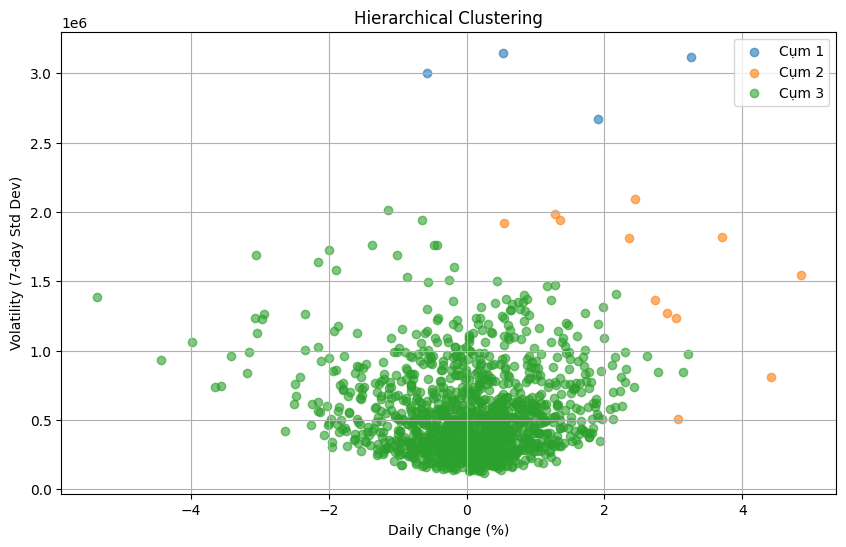

In [114]:
# Scatter plot theo c·ª•m c·ªßa Daily_Change v√† Volatility
plt.figure(figsize=(10, 6))
for cluster in np.unique(hierarchical_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Daily_Change'], cluster_data['Volatility'], label=f'C·ª•m {cluster}', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel('Daily Change (%)')
plt.ylabel('Volatility (7-day Std Dev)')
plt.legend()
plt.grid(True)

In [115]:
# Hi·ªÉn th·ªã th√¥ng tin c√°c c·ª•m
print("Th√¥ng tin c√°c c·ª•m:")
for cluster in np.unique(hierarchical_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"C·ª•m {cluster}: {len(cluster_data)} ng√†y, Bi·∫øn ƒë·ªông trung b√¨nh: {cluster_data['Volatility'].mean():.2f}, Thay ƒë·ªïi trung b√¨nh: {cluster_data['Daily_Change'].mean():.2f}%")

Th√¥ng tin c√°c c·ª•m:
C·ª•m 1: 4 ng√†y, Bi·∫øn ƒë·ªông trung b√¨nh: 2985303.75, Thay ƒë·ªïi trung b√¨nh: 1.28%
C·ª•m 2: 12 ng√†y, Bi·∫øn ƒë·ªông trung b√¨nh: 1526407.06, Thay ƒë·ªïi trung b√¨nh: 2.73%
C·ª•m 3: 1308 ng√†y, Bi·∫øn ƒë·ªông trung b√¨nh: 540793.29, Thay ƒë·ªïi trung b√¨nh: 0.03%


# √Åp d·ª•ng K-Means Clustering

In [116]:
# Ch·ªçn s·ªë c·ª•m
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)
data['KMeans_Cluster'] = kmeans_clusters + 1  # +1 ƒë·ªÉ nh√£n c·ª•m b·∫Øt ƒë·∫ßu t·ª´ 1

# ƒê√°nh gi√° hi·ªáu su·∫•t gi·ªØa Hierarchical Cluster v√† K-Means Clustering

In [133]:
# Silhouette Score (c√†ng cao c√†ng t·ªët, t·ª´ -1 ƒë·∫øn 1)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_clusters)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_clusters)

# Davies-Bouldin Index (c√†ng th·∫•p c√†ng t·ªët)
hierarchical_db = davies_bouldin_score(X_scaled, hierarchical_clusters)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_clusters)

print("So s√°nh hi·ªáu su·∫•t:")
print("- Silhouette Score c√†ng cao c√†ng t·ªët, t·ª´ -1 ƒë·∫øn 1")
print(f"\t + Silhouette Score (Hierarchical): {hierarchical_silhouette:.4f}")
print(f"\t + Silhouette Score (K-Means): {kmeans_silhouette:.4f}")
print("- Davies-Bouldin c√†ng th·∫•p c√†ng t·ªët")
print(f"\t + Davies-Bouldin Index (Hierarchical): {hierarchical_db:.4f}")
print(f"\t + Davies-Bouldin Index (K-Means): {kmeans_db:.4f}")

So s√°nh hi·ªáu su·∫•t:
- Silhouette Score c√†ng cao c√†ng t·ªët, t·ª´ -1 ƒë·∫øn 1
	 + Silhouette Score (Hierarchical): 0.6239
	 + Silhouette Score (K-Means): 0.3768
- Davies-Bouldin c√†ng th·∫•p c√†ng t·ªët
	 + Davies-Bouldin Index (Hierarchical): 0.7045
	 + Davies-Bouldin Index (K-Means): 0.9244


# 5. V·∫Ω bi·ªÉu ƒë·ªì gi√° v√†ng v·ªõi c√°c c·ª•m (K-Means)

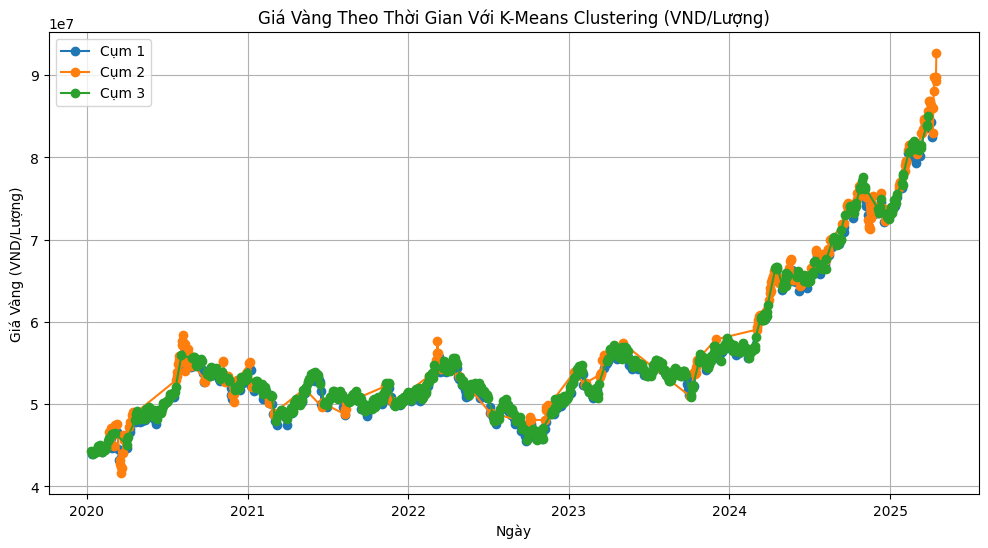

In [127]:
plt.figure(figsize=(12, 6))
for cluster in np.unique(kmeans_clusters + 1):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    plt.plot(cluster_data['Date'], cluster_data['Gold_Price_VND_per_Luong'], label=f'C·ª•m {cluster}', marker='o', linestyle='-')
plt.title('Gi√° V√†ng Theo Th·ªùi Gian V·ªõi K-Means Clustering (VND/L∆∞·ª£ng)')
plt.xlabel('Ng√†y')
plt.ylabel('Gi√° V√†ng (VND/L∆∞·ª£ng)')
plt.legend()
plt.grid(True)
plt.show()

# 6. V·∫Ω scatter plot so s√°nh gi·ªØa Hierarchical Clustering v√† K-Means Clustering

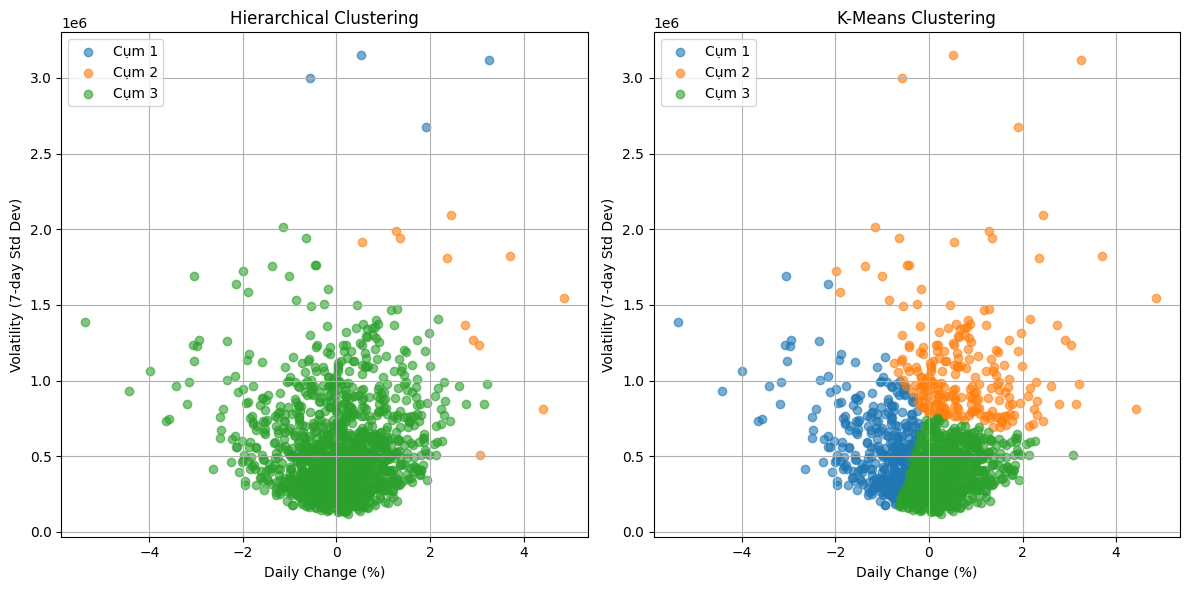

**N·∫øu b·∫°n mu·ªën th·ª≠ s·ªë c·ª•m kh√°c, thay ƒë·ªïi t=3 (Hierarchical) v√† n_clusters=3 (K-Means). ƒê·ªÉ ch·ªçn s·ªë c·ª•m t·ªëi ∆∞u cho K-Means, b·∫°n c√≥ th·ªÉ th√™m Elbow Method ƒë·ªÉ tham kh·∫£o nh∆∞ b√™n d∆∞·ªõi**


In [130]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for cluster in np.unique(hierarchical_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Daily_Change'], cluster_data['Volatility'], label=f'C·ª•m {cluster}', alpha=0.6)
plt.title('Hierarchical Clustering')
plt.xlabel('Daily Change (%)')
plt.ylabel('Volatility (7-day Std Dev)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for cluster in np.unique(kmeans_clusters + 1):
    cluster_data = data[data['KMeans_Cluster'] == cluster]
    plt.scatter(cluster_data['Daily_Change'], cluster_data['Volatility'], label=f'C·ª•m {cluster}', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Daily Change (%)')
plt.ylabel('Volatility (7-day Std Dev)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("**N·∫øu b·∫°n mu·ªën th·ª≠ s·ªë c·ª•m kh√°c, thay ƒë·ªïi t=3 (Hierarchical) v√† n_clusters=3 (K-Means). ƒê·ªÉ ch·ªçn s·ªë c·ª•m t·ªëi ∆∞u cho K-Means, b·∫°n c√≥ th·ªÉ th√™m Elbow Method ƒë·ªÉ tham kh·∫£o nh∆∞ b√™n d∆∞·ªõi**")

# Elbow Method cho K-Means

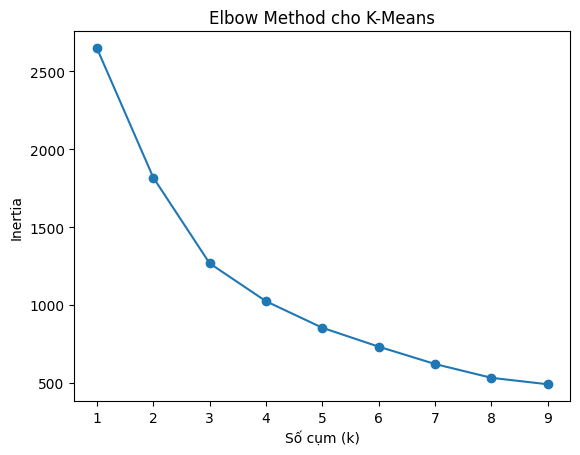

In [131]:
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 10), inertias, marker='o')
plt.title('Elbow Method cho K-Means')
plt.xlabel('S·ªë c·ª•m (k)')
plt.ylabel('Inertia')
plt.show()

**Gi·∫£i th√≠ch t·ª´ng ph·∫ßn**
1. Chu·∫©n b·ªã d·ªØ li·ªáu
    * D·ªØ li·ªáu gi√° v√†ng ƒë∆∞·ª£c t·∫£i t·ª´ Yahoo Finance (GLD), quy ƒë·ªïi sang VND/l∆∞·ª£ng.
    * T√≠nh hai ƒë·∫∑c tr∆∞ng: Daily_Change (% thay ƒë·ªïi gi√° h√†ng ng√†y) v√† Volatility (ƒë·ªô l·ªách chu·∫©n 7 ng√†y).
2. √Åp d·ª•ng Hierarchical Clustering
    * S·ª≠ d·ª•ng linkage v·ªõi ph∆∞∆°ng ph√°p average v√† chia th√†nh 3 c·ª•m b·∫±ng fcluster
3. √Åp d·ª•ng K-Means Clustering:
    * S·ª≠ d·ª•ng KMeans t·ª´ sklearn v·ªõi k=3, random_state=42 ƒë·ªÉ ƒë·∫£m b·∫£o k·∫øt qu·∫£ c√≥ th·ªÉ t√°i l·∫≠p.
4. ƒê√°nh gi√° hi·ªáu su·∫•t
    * Silhouette Score: ƒêo l∆∞·ªùng m·ª©c ƒë·ªô t√°ch bi·ªát gi·ªØa c√°c c·ª•m (gi√° tr·ªã t·ª´ -1 ƒë·∫øn 1, c√†ng cao c√†ng t·ªët).
    * Davies-Bouldin Index: ƒêo l∆∞·ªùng t·ª∑ l·ªá gi·ªØa ƒë·ªô ph√¢n t√°n trong c·ª•m v√† kho·∫£ng c√°ch gi·ªØa c√°c c·ª•m (c√†ng th·∫•p c√†ng t·ªët).
5. Tr·ª±c quan h√≥a:
    * V·∫Ω bi·ªÉu ƒë·ªì gi√° v√†ng theo th·ªùi gian v·ªõi c√°c c·ª•m t·ª´ c·∫£ hai ph∆∞∆°ng ph√°p.
    * V·∫Ω scatter plot ƒë·ªÉ so s√°nh c√°ch c√°c ƒëi·ªÉm d·ªØ li·ªáu ƒë∆∞·ª£c ph√¢n c·ª•m.
6. So s√°nh hi·ªáu su·∫•t (d·ª± ki·∫øn)
    - Silhouette Score
    * N·∫øu K-Means c√≥ ƒëi·ªÉm cao h∆°n, ƒëi·ªÅu n√†y cho th·∫•y c√°c c·ª•m ƒë∆∞·ª£c ph√¢n t√°ch t·ªët h∆°n, v√¨ K-Means t·ªëi ∆∞u h√≥a tr·ª±c ti·∫øp kho·∫£ng c√°ch ƒë·∫øn t√¢m c·ª•m.
    * Hierarchical Clustering c√≥ th·ªÉ c√≥ ƒëi·ªÉm th·∫•p h∆°n n·∫øu d·ªØ li·ªáu kh√¥ng c√≥ c·∫•u tr√∫c c·ª•m r√µ r√†ng (do n√≥ d·ª±a tr√™n kho·∫£ng c√°ch li√™n k·∫øt).
    - Davies-Bouldin Index
    * K-Means th∆∞·ªùng cho ch·ªâ s·ªë th·∫•p h∆°n (t·ªët h∆°n) n·∫øu d·ªØ li·ªáu c√≥ d·∫°ng h√¨nh c·∫ßu (spherical), v√¨ K-Means gi·∫£ ƒë·ªãnh c√°c c·ª•m c√≥ h√¨nh d·∫°ng n√†y.
    * Hierarchical Clustering c√≥ th·ªÉ ho·∫°t ƒë·ªông t·ªët h∆°n n·∫øu d·ªØ li·ªáu c√≥ c·∫•u tr√∫c ph·ª©c t·∫°p h∆°n (v√≠ d·ª•: c·ª•m kh√¥ng h√¨nh c·∫ßu).
7. So s√°nh th·ª±c t·∫ø
    - T·ªëc ƒë·ªô
    * K-Means nhanh h∆°n (ƒë·ªô ph·ª©c t·∫°p O(n*k*i) v·ªõi ùëò k l√† s·ªë c·ª•m, ùëñ i l√† s·ªë l·∫ßn l·∫∑p).
    * Hierarchical Clustering ch·∫≠m h∆°n (ƒë·ªô ph·ª©c t·∫°p ùëÇ ( ùëõ^2 ) O(n^2 ) ho·∫∑c ùëÇ ( ùëõ^3 ) O(n^3 ) t√πy ph∆∞∆°ng ph√°p li√™n k·∫øt).
    - T√≠nh linh ho·∫°t
    * Hierarchical Clustering kh√¥ng c·∫ßn x√°c ƒë·ªãnh tr∆∞·ªõc s·ªë c·ª•m v√† cung c·∫•p dendrogram ƒë·ªÉ tr·ª±c quan h√≥a.
    * K-Means y√™u c·∫ßu ch·ªçn k tr∆∞·ªõc, nh∆∞ng c√≥ th·ªÉ d√πng ph∆∞∆°ng ph√°p nh∆∞ Elbow Method ƒë·ªÉ x√°c ƒë·ªãnh k.
8. K·∫øt qu·∫£
    * Trong bi·ªÉu ƒë·ªì gi√° v√†ng, n·∫øu c√°c c·ª•m t·ª´ Hierarchical Clustering v√† K-Means c√≥ s·ª± kh√°c bi·ªát l·ªõn, ƒëi·ªÅu n√†y cho th·∫•y d·ªØ li·ªáu c√≥ th·ªÉ kh√¥ng ph√π h·ª£p v·ªõi gi·∫£ ƒë·ªãnh c·ªßa * K-Means (c·ª•m h√¨nh c·∫ßu). Scatter plot s·∫Ω gi√∫p b·∫°n th·∫•y r√µ c√°ch hai ph∆∞∆°ng ph√°p ph√¢n c·ª•m kh√°c nhau.